In [62]:
import numpy as np
import os
import shutil
import pandas as pd
import sys
import gzip
import nibabel as nib
from matplotlib import pyplot as plt
from scipy import stats

In [63]:
path = '/Users/nanatang/VAserversim/m/Researchers/SerenaT/fromjapan_fullruns/'
file = 'grand_PVS_report_RAW_firstrun.csv'


In [64]:
reportfile = os.path.join(path,file)
report = pd.read_csv(reportfile)
report['research group'].unique()
report

,subjects,research group,pvscount,pvsvol,icv norm,pvscountwm,pvsvolwm,icv norm wm,raw,WMH mask
0,ADNI3_007_S_4272y02_i1283142,EMCI,3813.0,11020.0,0.007898,3813.0,11020.0,0.007898,yes,yes
1,ADNI3_007_S_4387y01_i1064236,CN,3843.0,11101.0,0.007793,3843.0,11101.0,0.007793,yes,yes
2,ADNI3_007_S_4387y00_i925944,CN,3697.0,10254.0,0.007124,3697.0,10254.0,0.007124,yes,yes
3,ADNI3_007_S_4387y02_i1244513,CN,3649.0,9552.0,0.006665,3649.0,9552.0,0.006665,yes,yes
4,ADNI3_007_S_4488y00_i902659,CN,5234.0,12002.0,0.007352,5234.0,12002.0,0.007352,yes,yes
...,...,...,...,...,...,...,...,...,...,...
742,ADNI3_067_S_6117y04_i1477866,CN,3795.0,8814.0,0.005145,3795.0,8814.0,0.005145,yes,no
743,ADNI3_067_S_6442y00_i1011188,CN,5958.0,18965.0,0.011246,5958.0,18965.0,0.011246,yes,no
744,ADNI3_067_S_6443y00_i1011216,CN,2950.0,9120.0,0.006445,2950.0,9120.0,0.006445,yes,no
745,ADNI3_067_S_6443y02_i1480363,CN,1711.0,8010.0,0.005710,1711.0,8010.0,0.005710,yes,no


In [65]:
# step 1: fix all MCI labels
report_clean = report.replace(to_replace=r'.*MC.*', value='MCI', regex=True)
report_clean['research group'].unique()
report_clean

,subjects,research group,pvscount,pvsvol,icv norm,pvscountwm,pvsvolwm,icv norm wm,raw,WMH mask
0,ADNI3_007_S_4272y02_i1283142,MCI,3813.0,11020.0,0.007898,3813.0,11020.0,0.007898,yes,yes
1,ADNI3_007_S_4387y01_i1064236,CN,3843.0,11101.0,0.007793,3843.0,11101.0,0.007793,yes,yes
2,ADNI3_007_S_4387y00_i925944,CN,3697.0,10254.0,0.007124,3697.0,10254.0,0.007124,yes,yes
3,ADNI3_007_S_4387y02_i1244513,CN,3649.0,9552.0,0.006665,3649.0,9552.0,0.006665,yes,yes
4,ADNI3_007_S_4488y00_i902659,CN,5234.0,12002.0,0.007352,5234.0,12002.0,0.007352,yes,yes
...,...,...,...,...,...,...,...,...,...,...
742,ADNI3_067_S_6117y04_i1477866,CN,3795.0,8814.0,0.005145,3795.0,8814.0,0.005145,yes,no
743,ADNI3_067_S_6442y00_i1011188,CN,5958.0,18965.0,0.011246,5958.0,18965.0,0.011246,yes,no
744,ADNI3_067_S_6443y00_i1011216,CN,2950.0,9120.0,0.006445,2950.0,9120.0,0.006445,yes,no
745,ADNI3_067_S_6443y02_i1480363,CN,1711.0,8010.0,0.005710,1711.0,8010.0,0.005710,yes,no


In [66]:
# other cleaning that could be done:
# outliers that don't make sense
# anything that doesn't have WMH mask

In [67]:
# group by disease stage
grouped = report_clean.groupby(['research group'])
ad = grouped.get_group('AD')
mci = grouped.get_group('MCI')
cn = grouped.get_group('CN')


In [68]:
cn.count()

subjects          336
research group    336
pvscount          336
pvsvol            336
icv norm          336
pvscountwm        336
pvsvolwm          336
icv norm wm       336
raw               336
WMH mask          336
dtype: int64

In [69]:
cn['pvscount'].std()

1434.3207648550285

In [70]:
# step 2: extract global stats in each group (mean, std)
col = ['CN', 'MCI', 'AD']
index = ['mean PVS count', 'std PVS count', 'mean PVS volume', 'std PVS volume', 'mean PVS volume normed', 'std PVS volume normed']

mean_PVS_count = [cn['pvscount'].mean(), mci['pvscount'].mean(), ad['pvscount'].mean()]
std_PVS_count = [cn['pvscount'].std(), mci['pvscount'].std(), ad['pvscount'].std()]

mean_PVS_vol = [cn['pvsvol'].mean(), mci['pvsvol'].mean(), ad['pvsvol'].mean()]
std_PVS_vol = [cn['pvsvol'].std(), mci['pvsvol'].std(), ad['pvsvol'].std()]

mean_PVS_icvnorm = [cn['icv norm'].mean(), mci['icv norm'].mean(), ad['icv norm'].mean()]
std_PVS_icvnorm = [cn['icv norm'].std(), mci['icv norm'].std(), ad['icv norm'].std()]

statsall = pd.DataFrame([mean_PVS_count,std_PVS_count,mean_PVS_vol,std_PVS_vol,mean_PVS_icvnorm,std_PVS_icvnorm],index=index,columns=col)
statsall = statsall.style.set_caption('Stats PVS All')


mean_PVS_countwm = [cn['pvscountwm'].mean(), mci['pvscountwm'].mean(), ad['pvscountwm'].mean()]
std_PVS_countwm = [cn['pvscountwm'].std(), mci['pvscountwm'].std(), ad['pvscountwm'].std()]

mean_PVS_volwm = [cn['pvsvolwm'].mean(), mci['pvsvolwm'].mean(), ad['pvsvolwm'].mean()]
std_PVS_volwm = [cn['pvsvolwm'].std(), mci['pvsvolwm'].std(), ad['pvsvolwm'].std()]

mean_PVS_icvnormwm = [cn['icv norm wm'].mean(), mci['icv norm wm'].mean(), ad['icv norm wm'].mean()]
std_PVS_icvnormwm = [cn['icv norm wm'].std(), mci['icv norm wm'].std(), ad['icv norm wm'].std()]

statswm = pd.DataFrame([mean_PVS_countwm,std_PVS_countwm,mean_PVS_volwm,std_PVS_volwm,mean_PVS_icvnormwm,std_PVS_icvnormwm],index=index,columns=col)
statswm = statswm.style.set_caption('Stats PVS WM')


In [73]:
# step 3: Wang et al calculations, for global stats
# ANOVA?
fvalue, pvalue = stats.f_oneway(cn['icv norm wm'], mci['icv norm wm'], ad['icv norm wm'])
print(fvalue, pvalue)




1.0324464228159298 0.35664430243232054


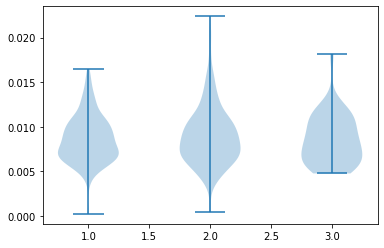

In [75]:
# step 4: plot stuff

## combine these different collections into a list
data_to_plot = [cn['icv norm wm'], mci['icv norm wm'], ad['icv norm wm']]

# Create a figure instance
fig = plt.figure()

# Create the boxplot
violin = plt.violinplot(data_to_plot)
plt.show()

In [ ]:
# step n: regional stats (need to come up with a pipeline for this, not straight forward)
# should get: HP, GM / BG, CSO